In [1]:
# load libraries used in script

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl

import scipy as scipy
from scipy.interpolate import BSpline, make_interp_spline

import os
import json

mpl.rcParams['font.family']='serif'
mpl.rcParams['font.size']=14


In [6]:
# extinction table excerpted from 
#   Allen's Astrophysical Quantities, 4th ed, p. 527

# wavelength in micron in the original
#   here, in nanometers
wavelength = np.array([120, 130, 150, 180, 
                       200, 218, 240, 260, 280, 330, 365, 440, 550, 700, 900, 
                       1250, 1650, 2200, 3400, 5000])
RV3p1 = np.array([3.58, 3.12, 2.66, 2.52, 2.84, 3.18, 2.54, 2.15, 1.94,
                 1.65, 1.56, 1.31, 1.00, 0.749, 0.479, 0.282, 0.176, 
                 0.108, 0.051, 0.027])
RV5 = np.array([1.74, 1.60, 1.49, 1.52, 
               1.74, 1.97, 1.68, 1.50, 1.42, 1.35, 1.33, 1.20, 1.00, 0.794, 
               0.556, 0.327, 0.204, 0.125, 0.059, 0.031])

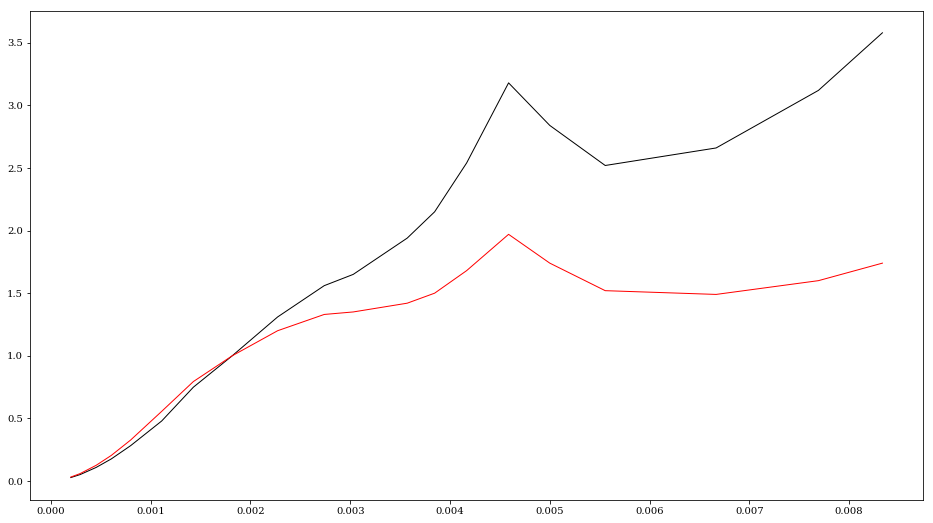

In [7]:
fig = plt.figure(figsize=(16,9))
plt.plot(1.0/wavelength, RV3p1, color='black',linewidth=1, label='Rv 3.1')
plt.plot(1.0/wavelength, RV5, color='red',linewidth=1, label='Rv 5')

#plt.xlim(525,575)
#plt.ylim(0,1E-12)

(0, 1000)

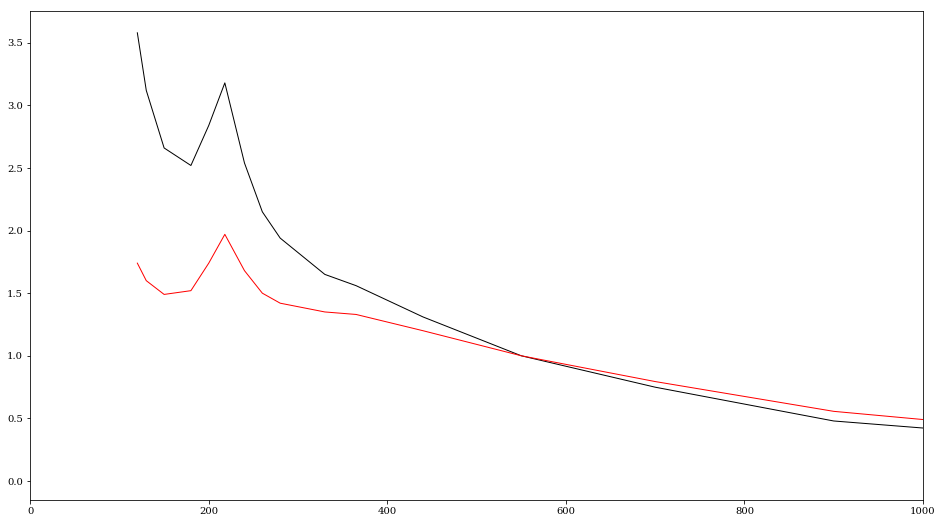

In [8]:
fig = plt.figure(figsize=(16,9))
plt.plot(wavelength, RV3p1, color='black',linewidth=1, label='Rv 3.1')
plt.plot(wavelength, RV5, color='red',linewidth=1, label='Rv 5')

plt.xlim(0,1000)
#plt.ylim(0,1E-12)

In [9]:

l, r = [(2, 0.0)], [(2, 0.0)]
b_n = make_interp_spline(wavelength, RV3p1, bc_type=(l, r))

(0, 1000)

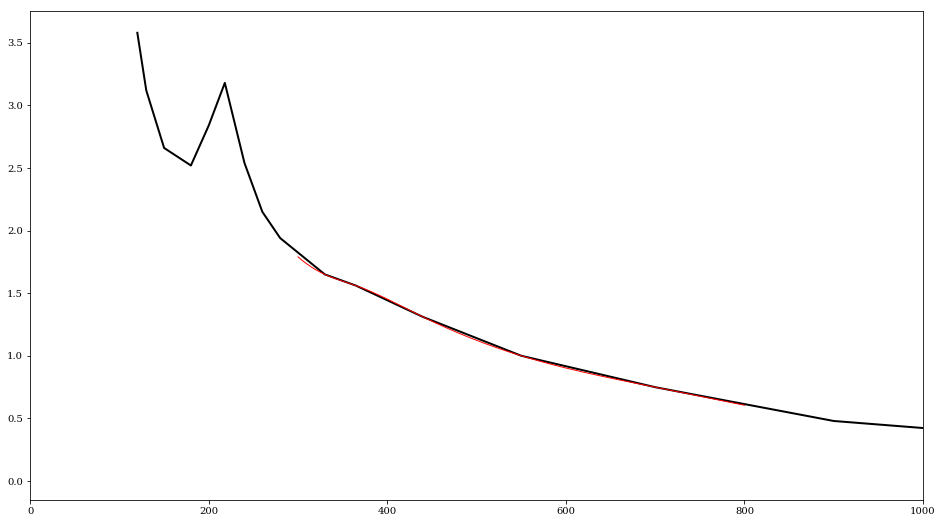

In [12]:
outWave = np.arange(300,801,1)
outExtinction = b_n(outWave)


fig = plt.figure(figsize=(16,9))
plt.plot(wavelength, RV3p1, color='black',linewidth=2, label='Rv 3.1')
plt.plot(outWave, outExtinction, color='red',linewidth=1, label='Interpolated')

plt.xlim(0,1000)
#plt.ylim(0,1E-12)

In [14]:
extinctionLaws = {}
extinctionLaws['Rv3.1'] = []
extinctionLaws['Rv3.1'].append({
    'wavelength': outWave.tolist(),
    'Alambda':outExtinction.tolist()
})

print(extinctionLaws)

## Export extinction laws

json.dumps(extinctionLaws, indent=4)

with open('extinctionLaws.json', 'w') as outfile:
    json.dump(extinctionLaws,outfile, indent=4)

{'Rv3.1': [{'wavelength': [300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494

In [ ]:
# after exporting, make a copy as a .js file, 
# with variable declaration at the head